In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from queue import PriorityQueue

# 1

In [2]:
K = 17
L = len("Frem")
fname1 = ((K*L*23) % (20)) + 1
fname2 = ((fname1 + ((K*5 + L*7) % (19))) % (20)) + 1
print(f'X:{fname1}\nY:{fname2}')

X:5
Y:4


In [3]:
file1 = open(f'hw1-source/00{fname1}.txt','r')
file2 = open(f'hw1-source/00{fname2}.txt','r')

file1_string = file1.read()
file2_string = file2.read()

In [4]:
def countFreqs(to_cnt):
    char_cnt = {}
    for i in to_cnt.lower():
        if not char_cnt.get(i):
            char_cnt[i] = 1
        else:
            char_cnt[i] += 1
    return char_cnt

In [5]:
def countProbs(to_cnt):
    to_ret = {}
    char_cnt = countFreqs(to_cnt)
    for i in char_cnt.keys():
        to_ret[i] = char_cnt[i]/len(to_cnt)
    return to_ret

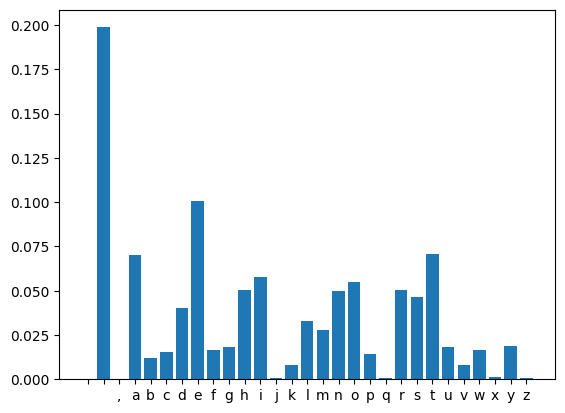

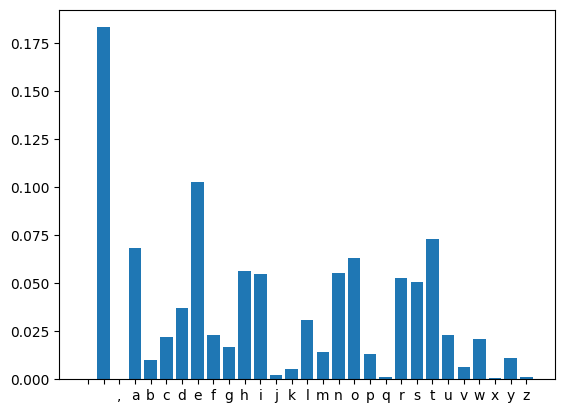

[('\n', 0.00018351991191044228),
 (' ', 0.198752064599009),
 (',', 0.00018351991191044228),
 ('a', 0.0699210864378785),
 ('b', 0.011928794274178749),
 ('c', 0.015599192512387594),
 ('d', 0.04019086070838686),
 ('e', 0.10038539181501192),
 ('f', 0.016700311983850247),
 ('g', 0.017984951367223345),
 ('h', 0.05065149568728207),
 ('i', 0.05799229216369976),
 ('j', 0.0005505597357313268),
 ('k', 0.008258396035969904),
 ('l', 0.03266654432005873),
 ('m', 0.027711506698476784),
 ('n', 0.049917416039640304),
 ('o', 0.054872453661222245),
 ('p', 0.014131033217104056),
 ('q', 0.0007340796476417691),
 ('r', 0.050467975775371626),
 ('s', 0.04624701780143146),
 ('t', 0.07083868599743072),
 ('u', 0.017984951367223345),
 ('v', 0.00807487612405946),
 ('w', 0.016516792071939807),
 ('x', 0.001284639383373096),
 ('y', 0.018719031014865113),
 ('z', 0.0005505597357313268)]

In [6]:
f1_freqs = countFreqs(file1_string) 
f2_freqs = countFreqs(file2_string) 
f1_probs = dict(sorted(countProbs(file1_string).items()))
f2_probs = dict(sorted(countProbs(file2_string).items()))

plt.bar(range(len(f1_probs)), list(f1_probs.values()), align='center')
plt.xticks(range(len(f1_probs)), list(f1_probs.keys()))
plt.show()

plt.bar(range(len(f2_probs)), list(f2_probs.values()), align='center')
plt.xticks(range(len(f2_probs)), list(f2_probs.keys()))
plt.show()

sorted(f1_probs.items())

# 2

In [7]:
probs1 = np.fromiter(f1_probs.values(),float)
probs2 = np.fromiter(f2_probs.values(),float)
entropy1 = -probs1.T.dot(np.log2(probs1))
entropy2 = -probs2.T.dot(np.log2(probs2))
print(f'Entropy:\nFile 1: {entropy1}\nFile 2: {entropy2}')

Entropy:
File 1: 4.069225385533036
File 2: 4.0844754075785215


# 3

In [8]:
class node:
    def __init__(self, freq, char=None):
        self.freq = freq
        self.char = char
        self.left = None
        self.right = None
        self.code = ''
    def __lt__(self, sec):
        return self.freq < sec.freq

In [9]:
def construct_tree(freqs):
    Q = PriorityQueue()
    for i in ([node(v, k) for k, v in freqs.items()]):
        Q.put(i)
    while (Q.qsize() > 1):
        left = Q.get()
        right = Q.get()
        tmp = node(left.freq + right.freq)
        tmp.left = left
        tmp.right = right
        Q.put(tmp)
    return Q.get()
top = construct_tree(f1_freqs)

In [10]:
def construct_code(root):
    Q = PriorityQueue()
    Q.put(root)
    coding = {}
    while(not Q.empty()):
        curr = Q.get()
        right = curr.right 
        left = curr.left
        if(right):
            right.code = curr.code + '0'
            Q.put(right)
        if(left):
            left.code = curr.code + '1'
            Q.put(left)
        if(curr.char):
            coding[curr.char] = curr.code
    return coding

In [11]:
coding = dict(sorted(construct_code(top).items()))
coding

{'\n': '000111010110',
 ' ': '11',
 ',': '000111010111',
 'a': '0100',
 'b': '0001101',
 'c': '011001',
 'd': '00100',
 'e': '0000',
 'f': '010101',
 'g': '010100',
 'h': '1001',
 'i': '0111',
 'j': '00011101010',
 'k': '0001111',
 'l': '01011',
 'm': '01101',
 'n': '1011',
 'o': '1000',
 'p': '0001100',
 'q': '0001110110',
 'r': '1010',
 's': '00010',
 't': '0011',
 'u': '001011',
 'v': '00011100',
 'w': '011000',
 'x': '0001110100',
 'y': '001010',
 'z': '0001110111'}

# 4

In [12]:
codeLens = np.array([len(v) for _, v in coding.items()])
Lc1 = codeLens.T.dot(probs1)
Lc1

4.1137823453844735

In [13]:
Lc2 = codeLens.T.dot(probs2)
Lc2

4.151144225651943

In [14]:
#constructing code for second text
top2 = construct_tree(f2_freqs)
code2 = dict(sorted(construct_code(top2).items()))
codeLens2 = np.array([len(v) for _, v in code2.items()])
Lc2_2 = codeLens2.T.dot(probs2)

In [15]:
Lc2_2

4.121518538229555

In [16]:
code2

{'\n': '111110000110',
 ' ': '000',
 ',': '111110000111',
 'a': '0100',
 'b': '0101010',
 'c': '001000',
 'd': '00101',
 'e': '110',
 'f': '11110',
 'g': '010100',
 'h': '0111',
 'i': '1001',
 'j': '11111001',
 'k': '1111101',
 'l': '01011',
 'm': '111000',
 'n': '1000',
 'o': '0110',
 'p': '111001',
 'q': '111110001',
 'r': '1010',
 's': '1011',
 't': '0011',
 'u': '11101',
 'v': '0101011',
 'w': '001001',
 'x': '11111000010',
 'y': '111111',
 'z': '1111100000'}